In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("../dataset/HousingData.csv")

In [5]:
# Menampilkan informasi awal tentang data
print("Info awal tentang data:")
display(df.info())


Info awal tentang data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

In [6]:
# Menampilkan beberapa baris pertama data
print("\nBeberapa baris pertama data:")
display(df.head())


Beberapa baris pertama data:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
missing_values = df.isnull().sum()
display("Total nilai yang hilang per kolom:", missing_values)

'Total nilai yang hilang per kolom:'

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
invalid_values = (df < 0).sum()
print("\nTotal nilai invalid per kolom:\n", invalid_values)


Total nilai invalid per kolom:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [9]:
scaler = MinMaxScaler()
df_normalized= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Menampilkan statistik ringkasan data setelah normalisasi
print("\nStatistik ringkasan setelah normalisasi:\n")
display(df_normalized.describe())


Statistik ringkasan setelah normalisasi:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,0.040526,0.112119,0.389443,0.069959,0.349167,0.521869,0.675783,0.242381,0.371713,0.422208,0.622929,0.898568,0.303130,0.389618
std,0.098013,0.233889,0.250583,0.255340,0.238431,0.134627,0.288357,0.191482,0.378576,0.321636,0.230313,0.230205,0.197458,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.000000,0.131687,0.445392,0.435376,0.088259,0.130435,0.175573,0.510638,0.945730,0.148869,0.267222
50%,0.002781,0.000000,0.338343,0.000000,0.314815,0.507281,0.761071,0.188949,0.173913,0.272901,0.686170,0.986232,0.267660,0.360000
75%,0.039945,0.125000,0.646628,0.000000,0.491770,0.586798,0.937951,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

In [10]:
print(df_normalized[["LSTAT","MEDV"]].isnull().sum())

LSTAT    20
MEDV      0
dtype: int64


In [11]:

df_normalized['LSTAT'] = df_normalized['LSTAT'].fillna(df_normalized['LSTAT'].mean())

In [12]:
print(df[["LSTAT", "MEDV"]].isnull().sum())

LSTAT    20
MEDV      0
dtype: int64


# Machine Learning 
## melatih model

In [25]:
# Memisahkan fitur dan target
X = df_normalized[['LSTAT']].values
y = df_normalized[['MEDV']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [49]:
X_train, X_test = train_test_split(df_normalized[["LSTAT", "MEDV"]], test_size=0.2, random_state=42)

In [53]:
# Membangun model regresi linear
# model = sm.OLS(y_train, sm.add_constant(X_train))
# model_fit = model.fit()
# X_train_df = pd.DataFrame(X_train, columns=['feature1'])
# y_train_df = pd.DataFrame(y_train, columns=['target'])
# dataframe = pd.concat([X_train_df, y_train_df], axis=1)
model_fit =  ols(formula="MEDV ~ LSTAT", data=df_normalized).fit()

In [55]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     548.7
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.20e-82
Time:                        15:57:08   Log-Likelihood:                 272.28
No. Observations:                 506   AIC:                            -540.6
Df Residuals:                     504   BIC:                            -532.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6208      0.012     53.042      0.0

In [56]:
y_pred = model_fit.predict(sm.add_constant(X_train["LSTAT"]))

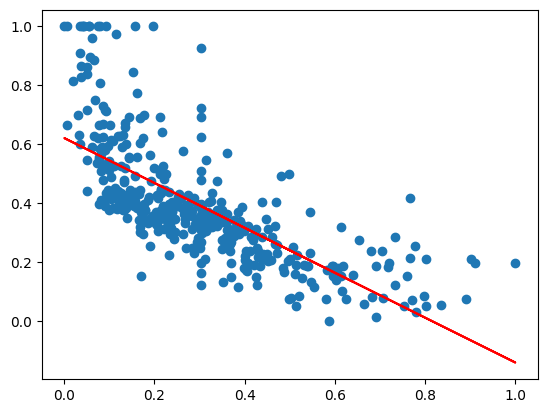

In [59]:
plt.plot(X_train["LSTAT"], y_pred, color="red")
plt.scatter(X_train["LSTAT"], X_train["MEDV"])
plt.show()

## analisis model

### melihat residu dari model

In [60]:
# Melihat residu
residuals = model_fit.resid

# Menampilkan residu
print("Residu:")
print(pd.DataFrame(residuals).describe())
print("median :",pd.DataFrame(residuals).median()[0])

Residu:
                  0
count  5.060000e+02
mean  -7.038726e-16
std    1.414146e-01
min   -3.380284e-01
25%   -8.940038e-02
50%   -2.943912e-02
75%    4.528715e-02
max    5.433564e-01
median : -0.02943912241036914


### ringkasan dari model

In [61]:
# Menampilkan summary model
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     548.7
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.20e-82
Time:                        15:58:05   Log-Likelihood:                 272.28
No. Observations:                 506   AIC:                            -540.6
Df Residuals:                     504   BIC:                            -532.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6208      0.012     53.042      0.0

## diagnostic plot

/Users/max/Desktop/learningML/.env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


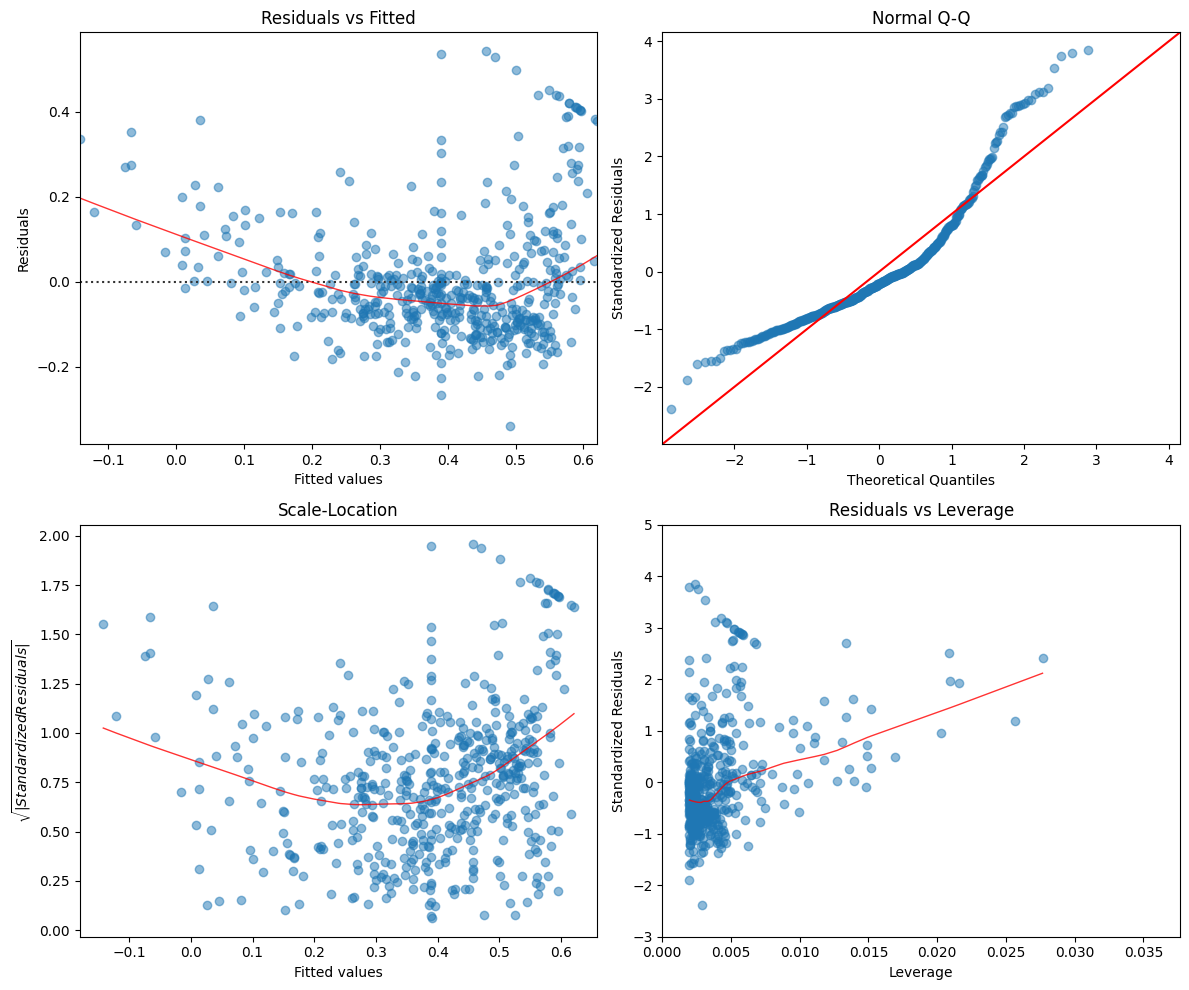

In [62]:
import sys
import os

# Menambahkan path ke folder yang berisi script2.py
sys.path.append(os.path.abspath('../my_package'))
from diagnosticPlot import diagnostic_plots
diagnostic_plots(X_train_df, y_train_df, model_fit)

### diagram residu

In [65]:
y_pred = model_fit.predict(sm.add_constant(X_test["LSTAT"]))

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_9892/833921482.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((X_test["MEDV"]-y_pred),bins=50);


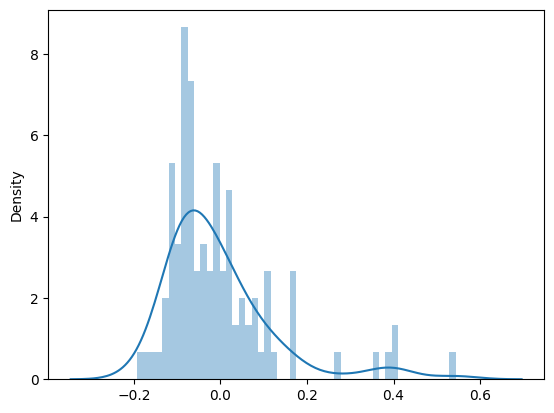

In [67]:
sns.distplot((X_test["MEDV"]-y_pred),bins=50);
plt.show()

In [69]:
from statsmodels.stats.anova import anova_lm
hasilAnova = anova_lm(model_fit)
hasilAnova

,df,sum_sq,mean_sq,F,PR(>F)
LSTAT,1.0,10.995436,10.995436,548.735758,1.200094e-82
Residual,504.0,10.099031,0.020038,NaN,NaN


# polynominal Regresion

In [ ]:
X_poly = np.c_[X_train, X_train**2]  # Menambahkan fitur X^2 sebagai bagian non-linear
X_poly = sm.add_constant(X_poly)

In [130]:
model_fit = sm.OLS.from_formula("MEDV ~ LSTAT + np.power(LSTAT, 2)", data=X_train).fit()

In [131]:
x_fit = np.linspace(X_train['LSTAT'].min(), X_train['LSTAT'].max(), 100)
x_fit_df = pd.DataFrame({'LSTAT': x_fit})
x_fit_df['LSTAT_squared'] = x_fit_df['LSTAT'] ** 2
y_fit = model_fit.predict(x_fit_df)

In [132]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     305.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           2.17e-81
Time:                        19:25:55   Log-Likelihood:                 249.94
No. Observations:                 404   AIC:                            -493.9
Df Residuals:                     401   BIC:                            -481.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7612      0

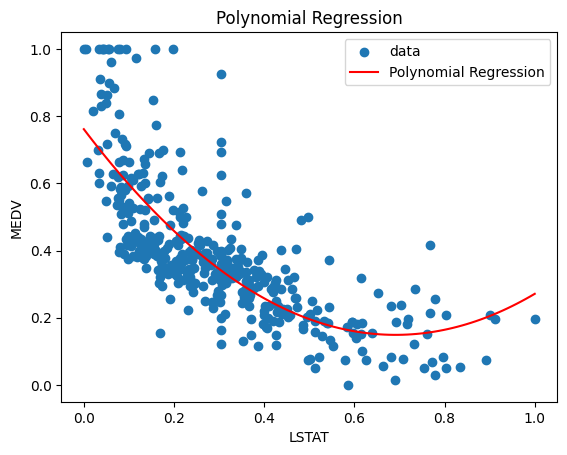

In [133]:
plt.scatter(X_train["LSTAT"],X_train["MEDV"], label="data")
plt.plot(x_fit, y_fit, color='red', label='Polynomial Regression')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [135]:
display(anova_lm(model_fit))

,df,sum_sq,mean_sq,F,PR(>F)
LSTAT,1.0,8.895310,8.895310,519.720844,2.219403e-74
"np.power(LSTAT, 2)",1.0,1.573133,1.573133,91.912491,9.779360e-20
Residual,401.0,6.863337,0.017116,NaN,NaN
